# Linear Regression & Gradient Descent 

## Importing the data

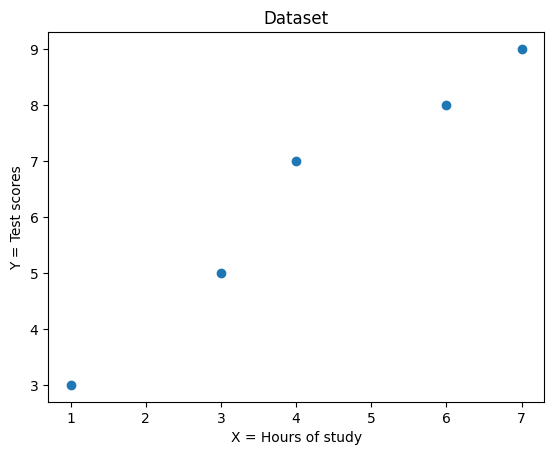

In [1]:
# Importing toy dataset
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('X = Hours of study')
plt.ylabel('Y = Test scores')
plt.title('Dataset')
plt.show()

## Functions used for Gradient Descent

In [3]:
# Function to compute the cost
def compute_cost(b, a, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (a * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N


# Function to compute the gradients (iterating over all the datapoints)
def step_gradient(b_current, a_current, points, learning_rate):
    a_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        a_gradient += - (2/N) * x * (y - (a_current * x + b_current))
        b_gradient += - (2/N) * (y - (a_current * x + b_current))

    #Update current m and b
    a_updated = a_current - learning_rate * a_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, a_updated

# Function that implements Gradient Descent algorithm
def gradient_descent_runner(points, starting_b, starting_a, learning_rate, num_iterations):
    b = starting_b
    a = starting_a
    historic_a_b = [[b, a]]
    cost_graph = []

    #For every iteration, optimize b, a and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, a, points))
        b, a = step_gradient(b, a, array(points), learning_rate)
        historic_a_b.append([b, a])

    return [b, a, cost_graph, historic_a_b]

# Fitted parameters

In [4]:
# Hyperparameters
learning_rate = 0.015
initial_b = 0 
initial_a = 0
num_iterations = 4

b, a, cost_graph, historic_a_b = gradient_descent_runner(points, initial_b, initial_a, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized a:', a)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, a, points))

Optimized b: 0.3053831327039999
Optimized a: 1.3468430097600002
Minimized cost: 0.9280513651353839


# Loss over iterations

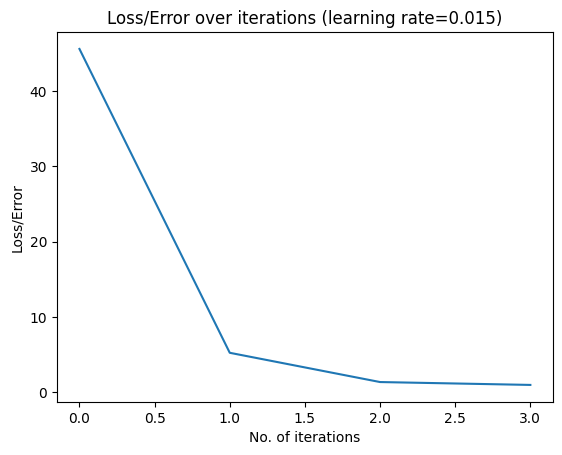

In [5]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Loss/Error')
plt.title('Loss/Error over iterations (learning rate={})'.format(learning_rate))
plt.show()

# Fitted lines over the iterations

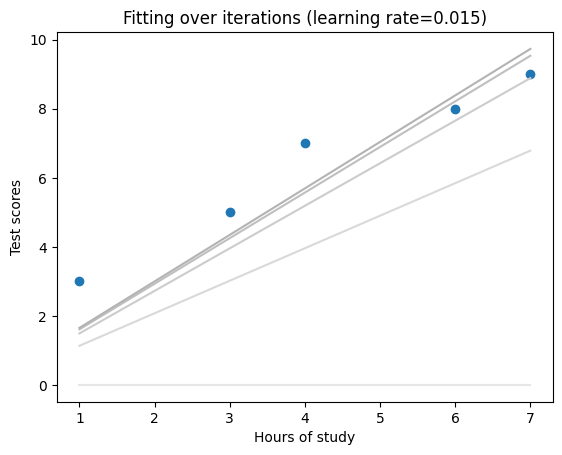

In [6]:
#Plot dataset
plt.scatter(x, y)

colors = ['0.9', '0.85', '0.8', '0.75', '0.7', '0.55', '0.4', '0.3', '0.2', '0.1', '0']

for idx, b_a_aux in enumerate(historic_a_b):
    b_aux = b_a_aux[0]
    a_aux = b_a_aux[1]
    pred_aux = a_aux * x + b_aux
    plt.plot(x, pred_aux, color=colors[idx])

#Plot predictions as line of best fit
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Fitting over iterations (learning rate={})'.format(learning_rate))
plt.show()

# Best fit

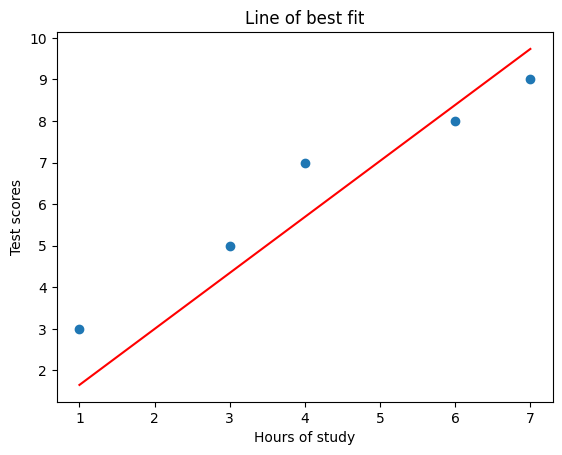

In [7]:
#Plot dataset
plt.scatter(x, y)

#Predict y values
pred = a * x + b

#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# Linear Regression using sklearn (least squares Linear Regression)

a: 0.9912280701754383
b: 2.2368421052631593


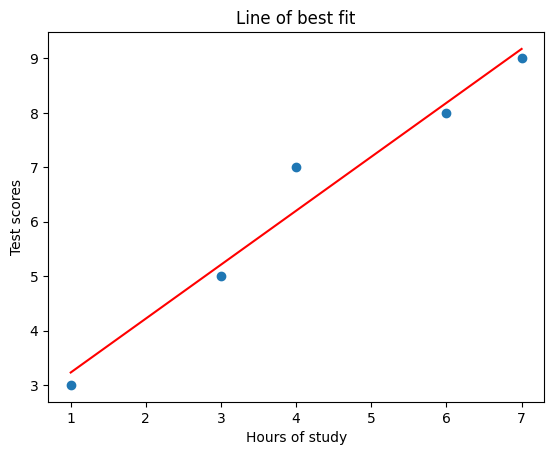

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit([[x_] for x_ in x], y)

print("a: {}".format(reg.coef_[0]))
print("b: {}".format(reg.intercept_))

#Plot dataset
plt.scatter(x, y)

#Predict y values
pred = reg.coef_ * x + reg.intercept_

#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# Linear Regression using SGD

a: 0.14853097842350033
b: 0.030376924416458635


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


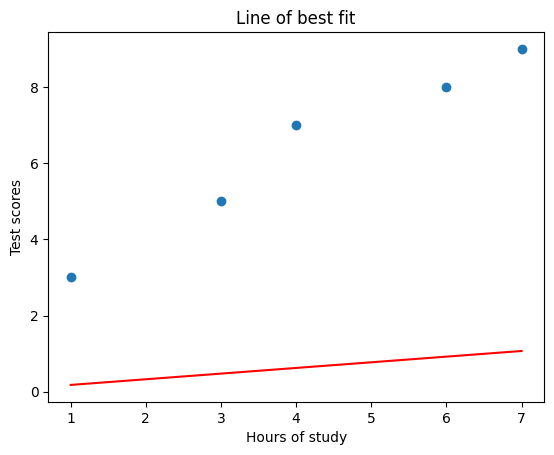

In [10]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=10,learning_rate='constant', eta0 = 0.0001, penalty=None, random_state=7777)
reg.fit([[x_] for x_ in x], y)

#Plot dataset
plt.scatter(x, y)

#Predict y values
pred = reg.coef_ * x + reg.intercept_

print("a: {}".format(reg.coef_[0]))
print("b: {}".format(reg.intercept_[0]))

#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()
